In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/viral-social-media-trends-and-engagement-analysis/Viral_Social_Media_Trends.csv


In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("atharvasoundankar/viral-social-media-trends-and-engagement-analysis")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/viral-social-media-trends-and-engagement-analysis


In [4]:
import os

# List all files in the dataset directory
for file in os.listdir(path):
    print(file)


Viral_Social_Media_Trends.csv


In [7]:
import pandas as pd
import os

# Load the dataset
file_path = os.path.join(path, "Viral_Social_Media_Trends.csv")
df = pd.read_csv(file_path)

# Preview the dataset
print(df.head())


  Post_ID   Platform     Hashtag Content_Type     Region    Views   Likes  \
0  Post_1     TikTok  #Challenge        Video         UK  4163464  339431   
1  Post_2  Instagram  #Education       Shorts      India  4155940  215240   
2  Post_3    Twitter  #Challenge        Video     Brazil  3666211  327143   
3  Post_4    YouTube  #Education       Shorts  Australia   917951  127125   
4  Post_5     TikTok      #Dance         Post     Brazil    64866  171361   

   Shares  Comments Engagement_Level  
0   53135     19346             High  
1   65860     27239           Medium  
2   39423     36223           Medium  
3   11687     36806              Low  
4   69581      6376           Medium  


In [8]:
# Show missing values per column
print("Missing values in each column:")
print(df.isnull().sum())


Missing values in each column:
Post_ID             0
Platform            0
Hashtag             0
Content_Type        0
Region              0
Views               0
Likes               0
Shares              0
Comments            0
Engagement_Level    0
dtype: int64


In [9]:
# Remove duplicate posts (if any)
df.drop_duplicates(subset='Post_ID', inplace=True)

# Normalize and clean text columns
df['Hashtag'] = df['Hashtag'].str.lower().str.strip()
df['Content_Type'] = df['Content_Type'].str.title().str.strip()
df['Platform'] = df['Platform'].str.title().str.strip()
df['Region'] = df['Region'].str.title().str.strip()

# Remove rows with zero or negative views (invalid for engagement)
df = df[df['Views'] > 0]

# Preview cleaned data
print(df.info())
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Post_ID           5000 non-null   object
 1   Platform          5000 non-null   object
 2   Hashtag           5000 non-null   object
 3   Content_Type      5000 non-null   object
 4   Region            5000 non-null   object
 5   Views             5000 non-null   int64 
 6   Likes             5000 non-null   int64 
 7   Shares            5000 non-null   int64 
 8   Comments          5000 non-null   int64 
 9   Engagement_Level  5000 non-null   object
dtypes: int64(4), object(6)
memory usage: 390.8+ KB
None
  Post_ID   Platform     Hashtag Content_Type     Region    Views   Likes  \
0  Post_1     Tiktok  #challenge        Video         Uk  4163464  339431   
1  Post_2  Instagram  #education       Shorts      India  4155940  215240   
2  Post_3    Twitter  #challenge        Video     Bra

In [11]:
# STEP 4: Create Engagement Rate
df['engagement_rate'] = (df['Likes'] + df['Shares'] + df['Comments']) / df['Views']

# Preview the result
print(df[['Post_ID', 'Views', 'Likes', 'Shares', 'Comments', 'engagement_rate']].head())


  Post_ID    Views   Likes  Shares  Comments  engagement_rate
0  Post_1  4163464  339431   53135     19346         0.098935
1  Post_2  4155940  215240   65860     27239         0.074192
2  Post_3  3666211  327143   39423     36223         0.109865
3  Post_4   917951  127125   11687     36806         0.191315
4  Post_5    64866  171361   69581      6376         3.812752


In [12]:
# STEP 5: Group data by Hashtag
hashtag_group = df.groupby('Hashtag')[['Views', 'Likes', 'Shares', 'Comments', 'engagement_rate']].mean()

# Sort by engagement rate (highest first)
hashtag_group_sorted = hashtag_group.sort_values(by='engagement_rate', ascending=False)

# Show top 10 hashtags
print("Top 10 hashtags by engagement rate:")
print(hashtag_group_sorted.head(10))


Top 10 hashtags by engagement rate:
                   Views          Likes        Shares      Comments  \
Hashtag                                                               
#viral      2.437590e+06  249964.492723  50428.889813  24776.513514   
#comedy     2.450142e+06  253615.746535  49418.049505  24798.885149   
#gaming     2.500699e+06  242819.588727  51360.818372  25332.237996   
#fitness    2.599391e+06  253130.125000  51183.119403  24532.694030   
#tech       2.516381e+06  260347.148676  48287.209776  25799.549898   
#education  2.531228e+06  260423.419048  51748.704762  24684.923810   
#fashion    2.426831e+06  249970.577002  50956.944559  24206.324435   
#dance      2.447363e+06  254484.889113  49557.957661  24565.044355   
#challenge  2.451335e+06  241212.439842  51182.428008  25207.850099   
#music      2.568759e+06  248012.815416  50965.628803  25024.496957   

            engagement_rate  
Hashtag                      
#viral             1.004747  
#comedy            0.

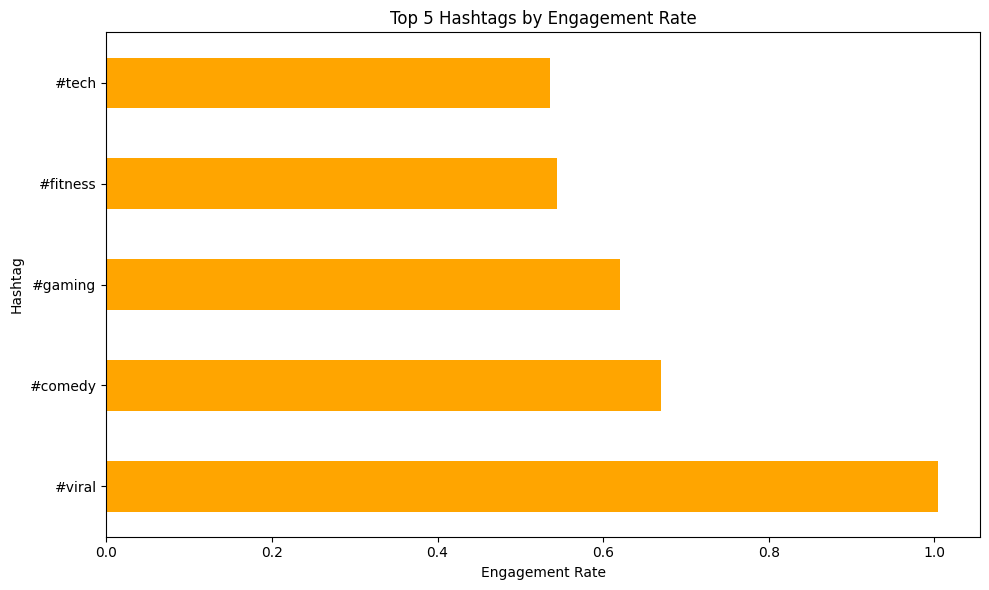

In [13]:
import matplotlib.pyplot as plt

top5_hashtags = hashtag_group_sorted.head(5)

plt.figure(figsize=(10, 6))
top5_hashtags['engagement_rate'].plot(kind='barh', color='orange')
plt.title("Top 5 Hashtags by Engagement Rate")
plt.xlabel("Engagement Rate")
plt.ylabel("Hashtag")
plt.tight_layout()
plt.show()


In [14]:
# STEP 6: Group data by Content_Type
content_group = df.groupby('Content_Type')[['Views', 'Likes', 'Shares', 'Comments', 'engagement_rate']].mean()

# Sort by engagement rate
content_group_sorted = content_group.sort_values(by='engagement_rate', ascending=False)

# Show results
print("Content types ranked by engagement rate:")
print(content_group_sorted)


Content types ranked by engagement rate:
                     Views          Likes        Shares      Comments  \
Content_Type                                                            
Shorts        2.486351e+06  247926.202033  49593.954257  25060.411690   
Live Stream   2.481009e+06  248811.616374  49921.960234  25167.635088   
Tweet         2.500387e+06  249384.470096  51427.454545  24635.985646   
Post          2.474337e+06  252784.174678  50164.198124  24554.968347   
Video         2.489009e+06  254768.923913  50614.386473  24694.614734   
Reel          2.533269e+06  255011.068966  51357.868014  25223.405470   

              engagement_rate  
Content_Type                   
Shorts               0.806289  
Live Stream          0.618768  
Tweet                0.520691  
Post                 0.498066  
Video                0.488207  
Reel                 0.487531  


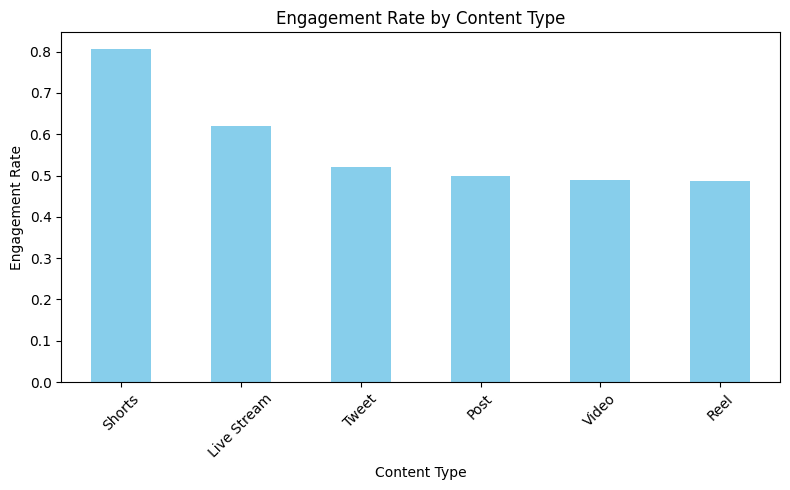

In [15]:
plt.figure(figsize=(8, 5))
content_group_sorted['engagement_rate'].plot(kind='bar', color='skyblue')
plt.title("Engagement Rate by Content Type")
plt.ylabel("Engagement Rate")
plt.xlabel("Content Type")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [16]:
# Filter dataset to include only TikTok posts
tiktok_df = df[df['Platform'] == 'Tiktok']

# Check number of rows after filtering
print(f"Number of TikTok posts: {tiktok_df.shape[0]}")


Number of TikTok posts: 1260


In [17]:
# Group TikTok data by hashtag
tiktok_hashtags = tiktok_df.groupby('Hashtag')[['Views', 'Likes', 'Shares', 'Comments', 'engagement_rate']].mean()
tiktok_hashtags_sorted = tiktok_hashtags.sort_values(by='engagement_rate', ascending=False)

# Show top 5 TikTok hashtags
print("Top TikTok Hashtags by Engagement Rate:")
print(tiktok_hashtags_sorted.head(5))


Top TikTok Hashtags by Engagement Rate:
                 Views          Likes        Shares      Comments  \
Hashtag                                                             
#viral    2.422529e+06  240532.630252  50501.621849  24822.705882   
#gaming   2.413461e+06  231231.131783  50140.209302  25342.403101   
#comedy   2.320651e+06  239242.348485  52853.939394  23111.106061   
#fitness  2.691882e+06  246932.714286  51153.769841  24978.301587   
#dance    2.490825e+06  259274.953125  49253.656250  25164.390625   

          engagement_rate  
Hashtag                    
#viral           2.668495  
#gaming          0.574146  
#comedy          0.526971  
#fitness         0.486801  
#dance           0.442887  


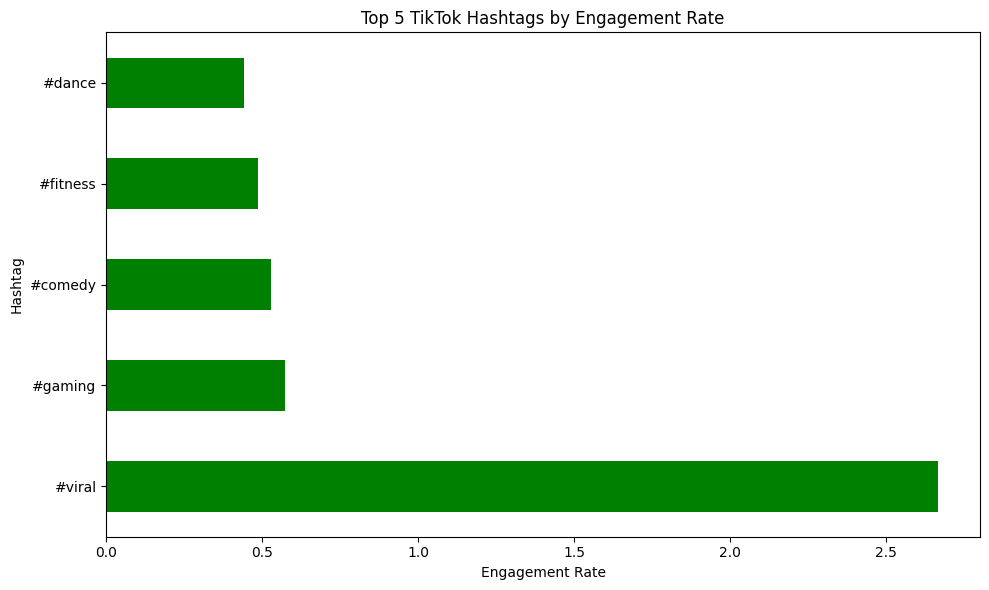

In [18]:
top5_tiktok_hashtags = tiktok_hashtags_sorted.head(5)

plt.figure(figsize=(10, 6))
top5_tiktok_hashtags['engagement_rate'].plot(kind='barh', color='green')
plt.title("Top 5 TikTok Hashtags by Engagement Rate")
plt.xlabel("Engagement Rate")
plt.ylabel("Hashtag")
plt.tight_layout()
plt.show()


In [20]:
# Analyze TikTok content types
tiktok_content = tiktok_df.groupby('Content_Type')[['Views', 'Likes', 'Shares', 'Comments', 'engagement_rate']].mean()
tiktok_content_sorted = tiktok_content.sort_values(by='engagement_rate', ascending=False)

print("TikTok Content Types by Engagement Rate:")
print(tiktok_content_sorted)


TikTok Content Types by Engagement Rate:
                     Views          Likes        Shares      Comments  \
Content_Type                                                            
Shorts        2.534584e+06  243964.235577  49862.918269  24697.264423   
Video         2.456759e+06  251171.869159  50171.457944  24887.443925   
Tweet         2.509945e+06  242029.706422  50695.000000  24291.325688   
Post          2.504727e+06  249243.152709  53530.049261  25094.014778   
Reel          2.678071e+06  254493.800000  53984.166667  25768.023810   
Live Stream   2.405590e+06  224167.111111  50662.024155  23948.478261   

              engagement_rate  
Content_Type                   
Shorts               1.689098  
Video                0.668349  
Tweet                0.447043  
Post                 0.396635  
Reel                 0.325581  
Live Stream          0.309529  


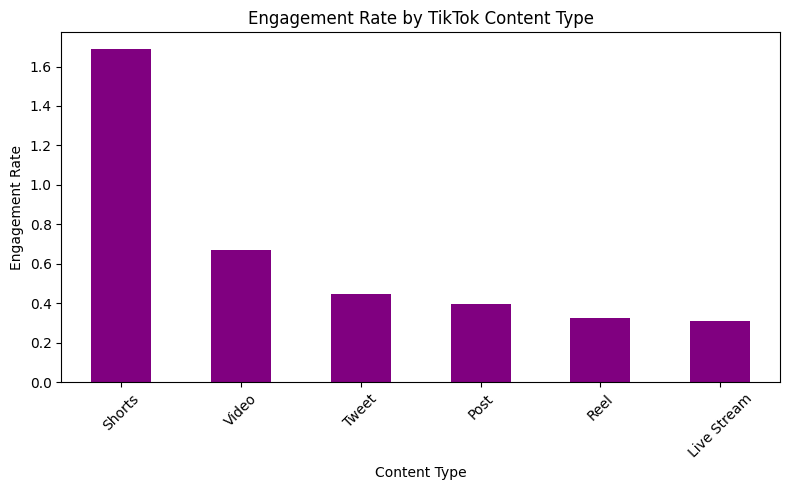

In [21]:
plt.figure(figsize=(8, 5))
tiktok_content_sorted['engagement_rate'].plot(kind='bar', color='purple')
plt.title("Engagement Rate by TikTok Content Type")
plt.ylabel("Engagement Rate")
plt.xlabel("Content Type")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
